In [1]:
from keras.models import Sequential
from keras.layers import Dense
import ehtim as eh
import numpy as np

INPUT_SIZE = 1030
OUTPUT_SIZE = 784

Using TensorFlow backend.


Welcome to eht-imaging! v  1.1.1


In [12]:
IM = eh.image.load_txt('../models/avery_sgra_eofn.txt')
IM = IM.resample_square(28)
def displayImage(arr):
    IM.imvec = arr
    IM.display()

Loading text image:  ../models/avery_sgra_eofn.txt


In [14]:
def getData(start, end):
    n = end - start
    x, y = np.empty([n, INPUT_SIZE]), np.empty([n, OUTPUT_SIZE])
    for i in range(n):
        obs = eh.obsdata.load_uvfits('inputs/obs{0}.fits'.format(start + i))
        im = eh.image.load_fits('outputs/img{0}.fits'.format(start + i))
        x[i] = obs.data['vis']
        y[i] = im.imvec
    return x, y

In [4]:
x_train, y_train = getData(0, 10)

Loading uvfits:  inputs/obs0.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img0.fits
Loading uvfits:  inputs/obs1.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img1.fits
Loading uvfits:  inputs/obs2.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img2.fits
Loading uvfits:  inputs/obs3.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img3.fits
Loading uvfits:  inputs/obs4.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img4.fits
Loading uvfits:  inputs/obs5.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img5.fits
Loading uvfits:  inputs/obs6.fits
no IF in uvfits he

In [5]:
model = Sequential()
model.add(Dense(32, input_dim=INPUT_SIZE, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(OUTPUT_SIZE))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=2)







Epoch 1/10
10/10 [==============================] - 4s 382ms/step - loss: 614644.1500
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 614591.2750
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 614487.7375
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 614315.1500
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 614052.1875
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 613670.6875
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 613139.0125
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 612431.8625
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 611501.3625
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 610313.1750


Loading uvfits:  inputs/obs10.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img10.fits
Loading uvfits:  inputs/obs11.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img11.fits
Loading uvfits:  inputs/obs12.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img12.fits
Loading uvfits:  inputs/obs13.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img13.fits
Loading uvfits:  inputs/obs14.fits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
Loading fits image:  outputs/img14.fits
0


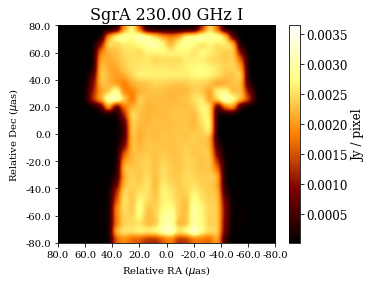

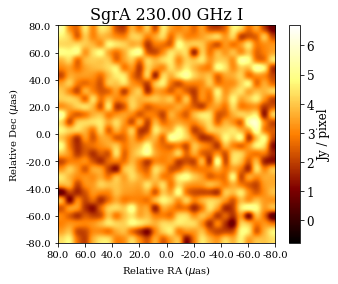

1


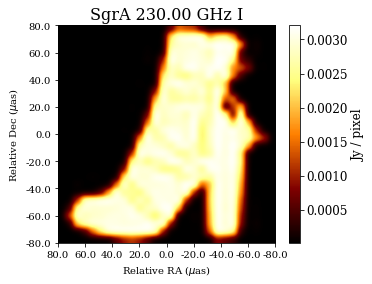

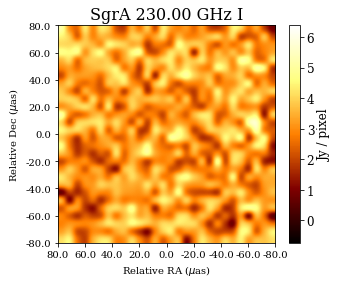

2


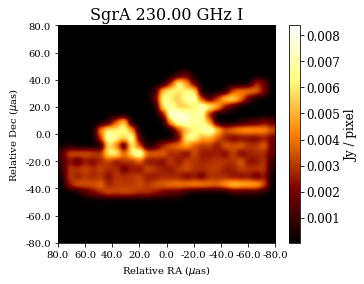

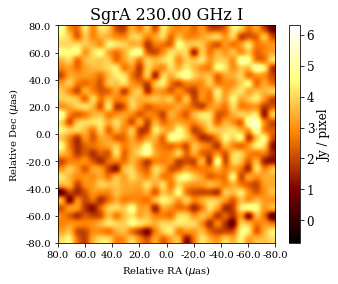

3


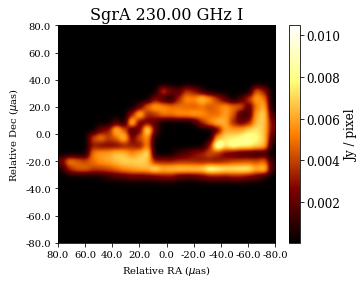

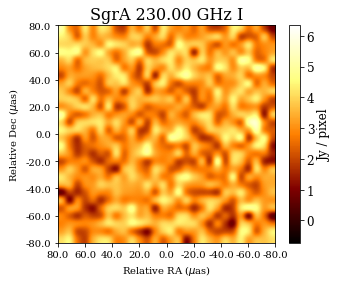

4


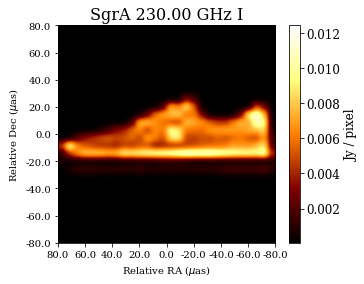

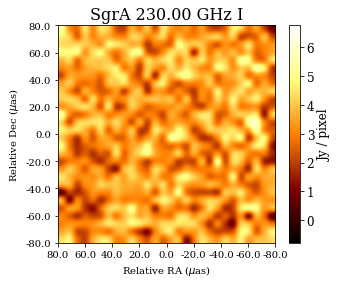

In [15]:
x_test, y_test = getData(10, 15)
# make a prediction
y_predict = model.predict(x_test)
# show the inputs and predicted outputs
for i in range(5):
    print(i)
    displayImage(y_test[i])
    displayImage(y_predict[i])